# Credit Card Customer Segmentation
Synali Parker 12.5.2020

### Background:
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

### Objective:
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

### Data Description:
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.

- Customer key - Identifier for the customer
- Average Credit Limit - Average credit limit across all the credit cards
- Total credit cards - Total number of credit cards
- Total visits bank - Total number of bank visits
- Total visits online - total number of online visits
- Total calls made - Total number of calls made by the customer

### 1. Perform univariate analysis on the data to better understand the variables at your disposal and to get an idea about the no of clusters. Perform EDA, create visualizations to explore data. (10 marks)

In [1]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import zscore
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#Import data
import xlsxwriter
path = (r'C:\Users\synap\Desktop\ML\Projects\Project 5\CreditCardCustomerData.xlsx')
xl = pd.ExcelFile(path)
data = xl.parse('Sheet1')

In [4]:
#Peak at the data
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


`When applying our models later, we'll need to drop "Sl_No" and "Customer Key" since they are not relevant to the data. We'll also have to scale so that "Avg_Credit_Limit" doesn't hold the most weight when clustering.`

In [5]:
#Check datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


`All of our fields are integers which is good.`

In [6]:
#Get some basic information on the data
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.00,660.00,660.00,660.00,660.00,660.00,660.00
mean,330.50,"55,141.44","34,574.24",4.71,2.40,2.61,3.58
std,190.67,"25,627.77","37,625.49",2.17,1.63,2.94,2.87
min,1.00,"11,265.00","3,000.00",1.00,0.00,0.00,0.00
25%,165.75,"33,825.25","10,000.00",3.00,1.00,1.00,1.00
50%,330.50,"53,874.50","18,000.00",5.00,2.00,2.00,3.00
75%,495.25,"77,202.50","48,000.00",6.00,4.00,4.00,5.00
max,660.00,"99,843.00","200,000.00",10.00,5.00,15.00,10.00


In [7]:
#Number of rows and columns
data.shape

(660, 7)

`There are 660 pieces of data to work with. This means we're looking at 660 customers to make predictions. Depending on how large the bank is, this may be a small sample set of data that isn't a good representation of the bank's users.`

In [8]:
#Check if there are any null values
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

`There are no null values. Since all of the data fields are integers, there may be values of 0 where they shouldn't be.`

In [9]:
# Checking the minimum values

print("Average Credit Limit Min:", data['Avg_Credit_Limit'].min())
print("Total Credit Cards Min:", data['Total_Credit_Cards'].min())
print("Total Visits Bank Min:", data['Total_visits_bank'].min())
print("Total Visits Online Min:", data['Total_visits_online'].min())
print("Total Calls Made Min:", data['Total_calls_made'].min())

Average Credit Limit Min: 3000
Total Credit Cards Min: 1
Total Visits Bank Min: 0
Total Visits Online Min: 0
Total Calls Made Min: 0


`If the minimum value of "Total_Credit_Cards" or "Avg_Credit_Limit" was zero then we could assume that some of the data may be invalid however that isn't the case here.`

In [10]:
#Show the count of unique values in each column
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

`Here we can see that "Sl_No" unique values matches the amount of rows in our dataset however, "Customer Key" should also which probably means that there are duplicate customers in our dataset which would skew the results of our clustering later on.`

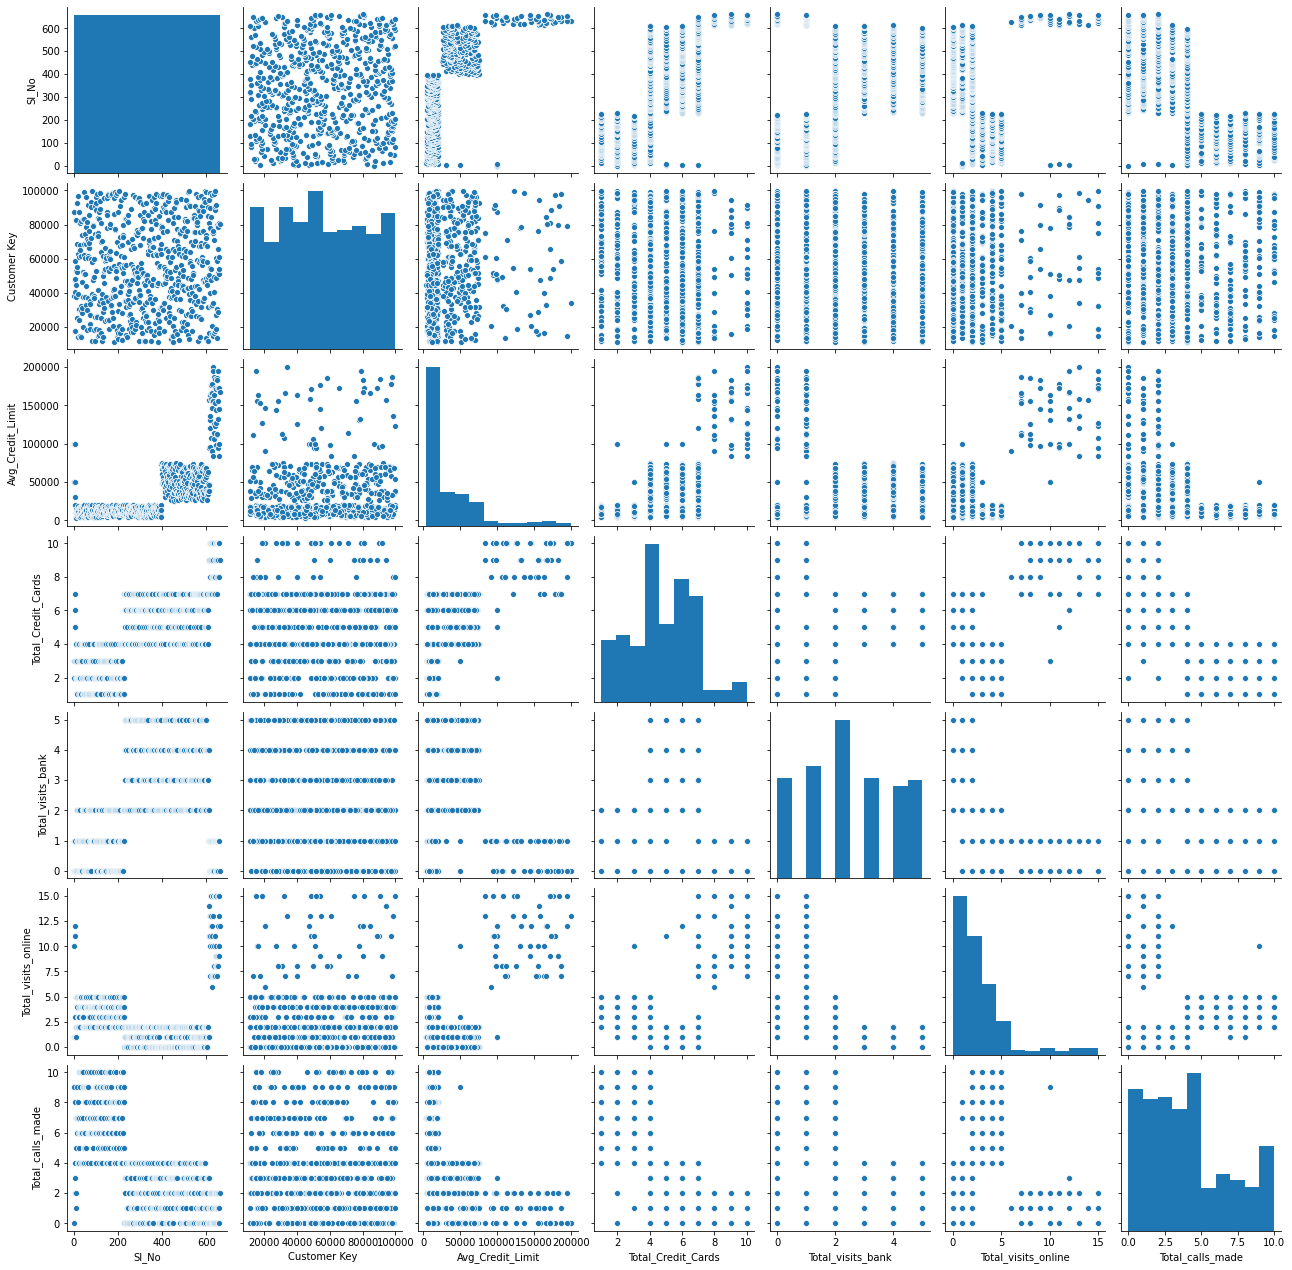

In [11]:
# Getting a visual of all of the data to see how values may be coorelated
sns.pairplot(data);

`It appears that the columns are independent of each other. There is some clustering that can be seen with a group in the top right (seen in the "Avg_Credit_Limit" versus "Total_visits_online" plot) anc maybe 2 clusters in the bottom left (seen in the "Total_Credit_Cards" versus "Total_calls_made" plot).`

### 3. Execute K-means clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [12]:
# First, we'll get rid of the "Sl_No" and "Customer Key" columns since they are not relevant to our clustering
dataAttr=data.iloc[:,2:]

# Next, we scale the data using Z-Score so that "Avg_Credit_Limit" doesn't hold the most weight in our clusters
dataScaled=dataAttr.apply(zscore)

In [13]:
#Let's look at dataAttr to make sure the correct columns are dropped
dataAttr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [14]:
#Let's take a look at dataScaled to make sure our Z-Score applied
dataScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.74,-1.25,-0.86,-0.55,-1.25
1,0.41,-0.79,-1.47,2.52,1.89
2,0.41,1.06,-0.86,0.13,0.15
3,-0.12,0.14,-0.86,-0.55,0.15
4,1.74,0.60,-1.47,3.20,-0.20


`We can see now that the values of all the data, most importantly the "Avg_Credit_Limit," are now scaled.`

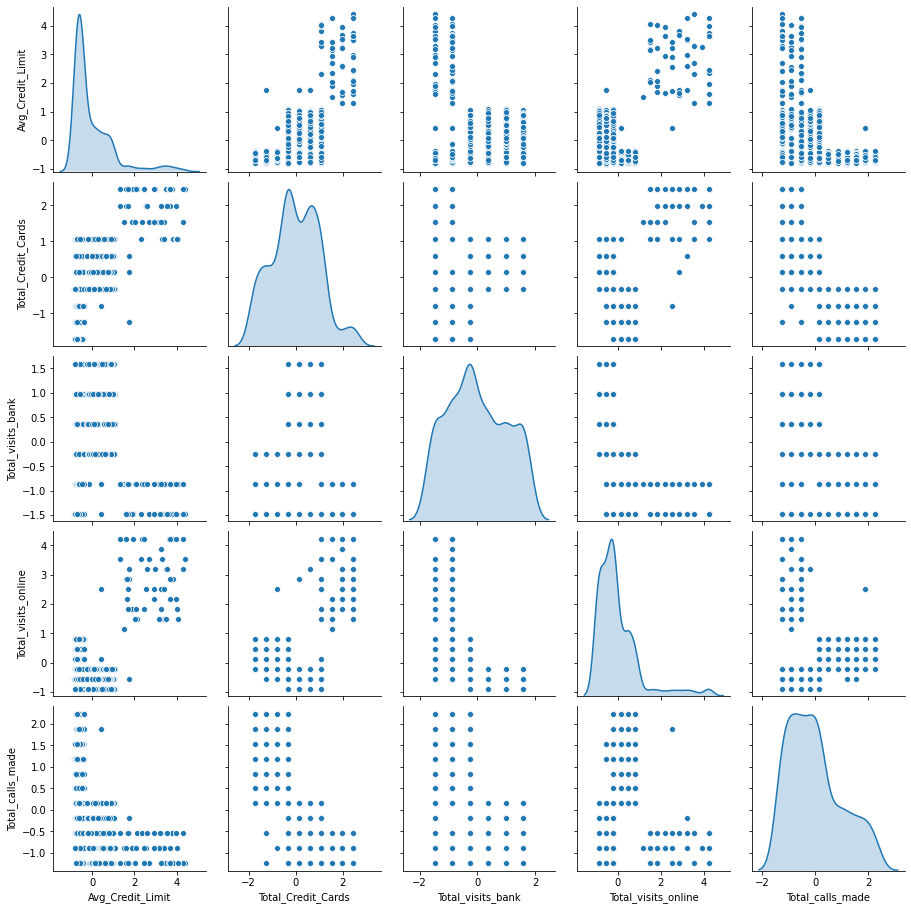

In [15]:
# Let's look at a pairplot to try and guess how many clusters may exist.
sns.pairplot(dataScaled,diag_kind='kde')

`Looking at the diagonal, we can try to guess how many clusters would be ideal. I would guess between 2-4 clusters. I choose 4 after observing the "Total_Credit_Cards" plot and 2 after observing the rest of the plots. I would think 3 may be the best option since that would be in the middle of my guesses.` 

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

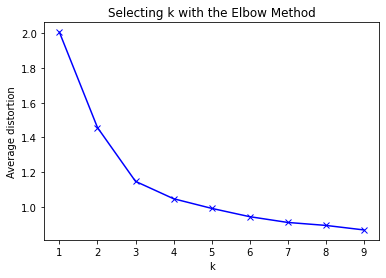

In [16]:
# Now we'll use the elbow method to try and select a good value for K before creating our KMeans model.
# From now on, we will fit all models to the scaled data ("dataScaled") to get better clustering.

from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataScaled)
    prediction=model.predict(dataScaled)
    meanDistortions.append(sum(np.min(cdist(dataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

`Based on the Elbow Method plot, I would select 3 as the value for k since it appears that the elbow begins to take a sharper bend at k = 3.`

In [18]:
# Let's now create the KMeans model using k = 3
# Again, we always want to use our scaled data for these models
km_model=KMeans(3)
km_model.fit(dataScaled)
prediction=km_model.predict(dataScaled)

#Append the prediction to include the grouping as a column
data["GROUP"] = prediction
dataAttr["GROUP"] = prediction
dataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
data.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


`We can see groups 0, 1, and 2 applied to our dataset which indicates the three clusters.`

In [89]:
# Now let's look at the mean of the groups and get an idea of how they can be classified
dataClust = dataAttr.groupby(['GROUP'])
dataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,"33,782.38",5.52,3.49,0.98,2.00
1,"12,174.11",2.41,0.93,3.55,6.87
2,"141,040.00",8.74,0.60,10.90,1.08


`Those in group 2 have high credit limits and also the most credit cards on average. They are also most likely to use online banking. Group 0 tends to be more likely to visit the bank in person and has the middle value for average credit limit and total credit cards compared to the other 2 groupings.`

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (3).

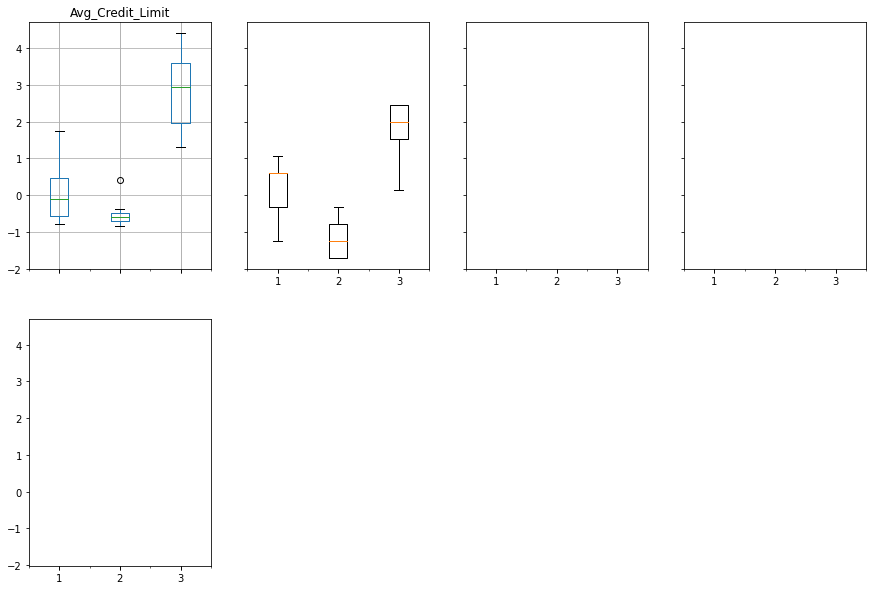

In [90]:
dataScaled.boxplot(by='GROUP', layout=(2,4), figsize=(15,10))

`Cannot get boxplot working properly.`

### 4. Execute hierarchical clustering (with different linkages) with the help of dendrogram and cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, cophenet, linkage
from scipy.spatial.distance import pdist

In [24]:
# Let's check the cophenetic coefficient for the Average method
# This will determing how much we should trust the following dendrogram

Z_avg = linkage(dataScaled, metric='euclidean', method='average')
c_avg, coph_dists = cophenet(Z_avg , pdist(dataScaled))

print("Cophenetic coefficient for Average linkage is: %.3f" % c_avg)

Cophenetic coefficient for Average linkage is: 0.917


`The closer the cophenetic coefficient is to 1 then the more reliable the dendrogram is and the cophenetic coefficient here is pretty high at 0.92 which is a good indication that the dendrogram will be reliable.`

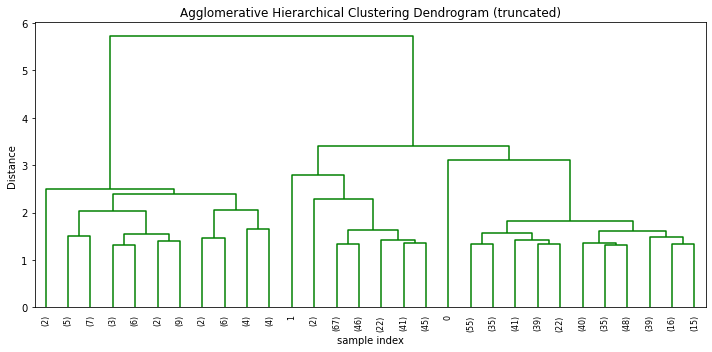

In [23]:
# Dendrogram for Average Method
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_avg, leaf_rotation=90,color_threshold=40,leaf_font_size=8, truncate_mode='lastp')
plt.tight_layout()

`Looking at the dendrogram, I would think 3 clusters would be best here at distance 3.`

In [25]:
# Let's check the cophenetic coefficient for the Complete method
# This will determing how much we should trust the following dendrogram

Z_comp = linkage(dataScaled, metric='euclidean', method='complete')
c_comp, coph_dists = cophenet(Z_comp , pdist(dataScaled))

print("Cophenetic coefficient for Complete linkage is: %.3f" % c_comp)

Cophenetic coefficient for Complete linkage is: 0.886


`The cophenetic coefficient for complete linkage is lower than for average so the dendrogram may be considered a bit less reliable.`

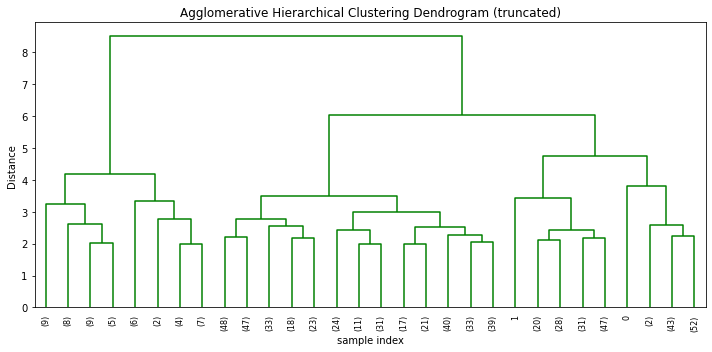

In [26]:
# Dendrogram for Complete Method
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_comp, leaf_rotation=90,color_threshold=40,leaf_font_size=8, truncate_mode='lastp')
plt.tight_layout()

`Based on this dendrogram I would select 3 clusters at distance = 5.`

In [27]:
Z_ward = linkage(dataScaled, metric='euclidean', method='ward')
c_ward, coph_dists = cophenet(Z_ward , pdist(dataScaled))

print("Cophenetic coefficient for Complete linkage is: %.3f" % c_ward)

Cophenetic coefficient for Complete linkage is: 0.774


`The cophenetic coefficient for ward linkage is even lower than both average and complete so the dendrogram may be considered even less reliable.`

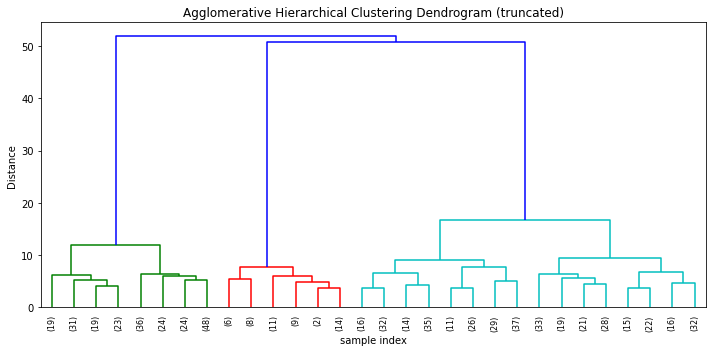

In [28]:
# Dendrogram for Average Method
plt.figure(figsize=(10,5))
plt.title('Agglomerative Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z_ward, leaf_rotation=90,color_threshold=40,leaf_font_size=8, truncate_mode='lastp')
plt.tight_layout()

`Even more clearly in this dendrogram, there are 3 main clusters and potentially 4. However the cophenetic coefficient does not make me more likely to select 3 clusters based on comparison to the other two methods.`

In [29]:
# Now that we've used the Cophenetic coefficient and dendrograms for each linakge method have been evaluated,
# let's use average linkage with 3 clusters for our Agglomerative Clustering model
# Again, using scaled data

agg_avg = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage ='average')
as_avg = agg_avg.fit(dataScaled)
as_avg

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

In [30]:
dataAttr['labels']=agg_avg.labels_
dataAttr.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP,labels
0,100000,2,1,1,0,0,0
1,50000,3,0,10,9,1,2
2,50000,7,1,3,4,0,0
3,30000,5,1,1,4,0,0
4,100000,6,0,12,3,2,1


`Here, the "labels" will reprent the grouping based on the Agglomerative Clustering model. We can see that there are 3 groups being applied.`

In [32]:
# Now let's look at the mean of the clustering from the Agglomerative Clustering model
# and get an idea of how they can be classified
dataAvgClust = dataAttr.groupby(['labels'])                                     
dataAvgClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
labels,,,,,,
0,"33,782.38",5.52,3.49,0.98,2.00,0
1,"141,040.00",8.74,0.60,10.90,1.08,2
2,"12,174.11",2.41,0.93,3.55,6.87,1


`Our group 1 has the highest average credit limit and also tend to have more credit cards and most likely to participate in online banking. These groups align similarly with those that were created using KMeans clustering.`

ValueError: The number of FixedLocator locations (6), usually from a call to set_ticks, does not match the number of ticklabels (3).

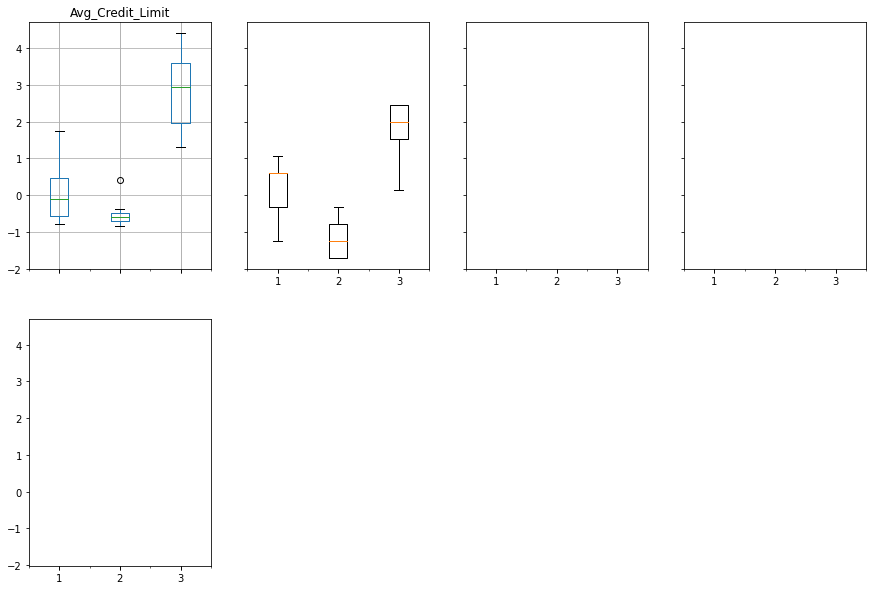

In [96]:
dataScaled.boxplot(by='GROUP', layout=(2,4), figsize=(15,10))

`Cannot get boxplot working properly.`

### 5. Calculate average silhouette score for both methods. (5 marks)

In [35]:
labels_kmeans = km_model.labels_
km_score = metrics.silhouette_score(dataScaled, labels_kmeans)
print('Silhouette Score: %.3f' % km_score)

Silhouette Score: 0.541


In [36]:
labels_avg = agg_avg.labels_
avg_score = metrics.silhouette_score(dataScaled, labels_avg)
print('Silhouette Score: %.3f' % avg_score)

Silhouette Score: 0.541


`The silhouette score for both KMeans and Agglomerative Clustering are the same which tells me that each model has classified objects similarly. The value 0.54 tells me that there may be some overlapping in the clusters. `

### 6. Compare K-means clusters with Hierarchical clusters. (5 marks)

After looking at the Groups created by the KMeans model and the Agglomerative Clustering model, they seem to have grouped very similarly. Each grouping in both models tend to tell similar stories about that group of datapoints.

That being said, I wouldn't necessarily select one model over the other based on the result, however KMeans is simpler to implement without having to change any configuartion of the model. 

### 7. Analysis of the clusters formed, tell us how is one cluster is different from another and answer all the key questions. (10 marks)

#### How many different segments of customers are there?
There are 3 segments of customers.

#### How are these segments different from each other?
* One segment of customers contains those who have more credit cards and thus a higher average credit limit and are more likely to participate in online banking.
* Another segment is those who are on the complete other end and don't have many credit cards, lower average credit limit and usually use the phone to contact the bank.
* The third group is between these two when it comes to number of credit cards and average credit limit. There isn't great distribution between where they're most likely to contact the bank so this group could contain some overlap with the other two.

#### What are your recommendations to the bank on how to better market to and service these customers?
Since we have these three groupings of customers, I would then take this a step further to determine which segment most of the customers are in to have a better understanding of where marketing efforts should be focussed. My reccommendation to the bank is to focus on online users since they have more credit cards already, they may be willing to apply for more and their average visits online are just overall higher than any other groups, visits which means this segment interacts with the bank the most. And with focussing efforts through online strategies, those who are still using calls and in-person visits to the bank, they could shift over toward online banking if they're advised that that is a quicker option.
